<h1 style="color:blue; text-align:center;">Telecom Customer Churn Predictor</h1>

### Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For ignoring Warnings while running Python codes.

import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)

## Loading Dataset

In [3]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
249,0959-WHOKV,Male,0,No,No,42,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,One year,Yes,Electronic check,99.00,4298.45,No
5901,6172-FECYY,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,84.50,4254.85,Yes
6351,1842-EZJMK,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,103.70,5071.05,Yes
5800,7129-CAKJW,Female,0,No,No,17,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
1072,7771-ZONAT,Male,0,No,No,22,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),56.75,1304.85,No
867,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
2070,8624-GIOUT,Female,0,No,No,49,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),59.75,2934.3,Yes
5215,7845-URHJN,Female,0,Yes,No,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.15,156.25,Yes
818,0115-TFERT,Male,0,Yes,No,21,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.20,2317.1,Yes
1643,9469-WEJBT,Male,0,Yes,No,37,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,90.35,3419.3,No


In [5]:
df.shape

(7043, 21)

## Data Preprocessing

- Dropping the `customerID` column as it is not relevant for the analysis.

In [6]:
df.drop('customerID', axis=1, inplace= True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- The `SeniorCitizen` column has an integer data type, but it is clearly a categorical variable.
- The `TotalCharges` column has an object data type, although it is a numerical feature.

To ensure the data is in the correct format for analysis and modeling, I will convert these columns to their appropriate data types.

In [8]:
print(df['SeniorCitizen'].unique())
print(df['TotalCharges'].nunique())

[0 1]
6531


In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

Upon converting the `TotalCharges` column to a numerical type, I encountered an error due to missing values represented by spaces. To resolve this, I will:

1. Replace the spaces with `NaN`.
2. Convert the column to float.
3. Fill the missing values with the median of the column.

In [10]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN)

df['TotalCharges'] = df['TotalCharges'].astype(float)

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

**Displaying Unique Values for Categorical Columns**

In [11]:
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    print('{0:20} : {1}'.format(column,str(unique_values)))

gender               : ['Female' 'Male']
SeniorCitizen        : ['0' '1']
Partner              : ['Yes' 'No']
Dependents           : ['No' 'Yes']
PhoneService         : ['No' 'Yes']
MultipleLines        : ['No phone service' 'No' 'Yes']
InternetService      : ['DSL' 'Fiber optic' 'No']
OnlineSecurity       : ['No' 'Yes' 'No internet service']
OnlineBackup         : ['Yes' 'No' 'No internet service']
DeviceProtection     : ['No' 'Yes' 'No internet service']
TechSupport          : ['No' 'Yes' 'No internet service']
StreamingTV          : ['No' 'Yes' 'No internet service']
StreamingMovies      : ['No' 'Yes' 'No internet service']
Contract             : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling     : ['Yes' 'No']
PaymentMethod        : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn                : ['No' 'Yes']


>Some features in our dataset, such as 'OnlineSecurity', have redundant values like 'No' and 'No internet service', which essentially mean the same thing. To improve clarity and consistency, I will unify these values.

- In the 'MultipleLines' column, 'No phone service' is replaced with 'No'.
- In columns like 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', and 'StreamingMovies', 'No internet service' is replaced with 'No'.

In [12]:
# Handling 'MultipleLines' column
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

# Handling other columns with 'No internet service'
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']
replace_map = {'No internet service': 'No'}
df[service_columns] = df[service_columns].replace(replace_map)

In [13]:
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    print('{0:20} : {1}'.format(column,str(unique_values)))

gender               : ['Female' 'Male']
SeniorCitizen        : ['0' '1']
Partner              : ['Yes' 'No']
Dependents           : ['No' 'Yes']
PhoneService         : ['No' 'Yes']
MultipleLines        : ['No' 'Yes']
InternetService      : ['DSL' 'Fiber optic' 'No']
OnlineSecurity       : ['No' 'Yes']
OnlineBackup         : ['Yes' 'No']
DeviceProtection     : ['No' 'Yes']
TechSupport          : ['No' 'Yes']
StreamingTV          : ['No' 'Yes']
StreamingMovies      : ['No' 'Yes']
Contract             : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling     : ['Yes' 'No']
PaymentMethod        : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn                : ['No' 'Yes']



The 'tenure' column shows the distribution of customer tenures. Upon inspection, '0' appears 11 times, which represents an anomaly since the minimum possible contract is a month-to-month basis. To address this:
- I will treat '0' as a missing value.
- Fill missing values with the median tenure.

In [14]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [15]:
df['tenure']  = df['tenure'].replace(0, np.NaN)
df['tenure'].fillna(df['tenure'].median(), inplace=True)

In [16]:
df['tenure'].value_counts()

tenure
1.0     613
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
38.0     59
28.0     57
39.0     56
44.0     51
36.0     50
Name: count, Length: 72, dtype: int64

## Exploratory Data Analysis

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.416442,24.526454,1.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


**Visualizing the distribution of customer churn in the dataset using a pie chart.**



In [18]:
churn_counts = df['Churn'].value_counts()
churn_counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

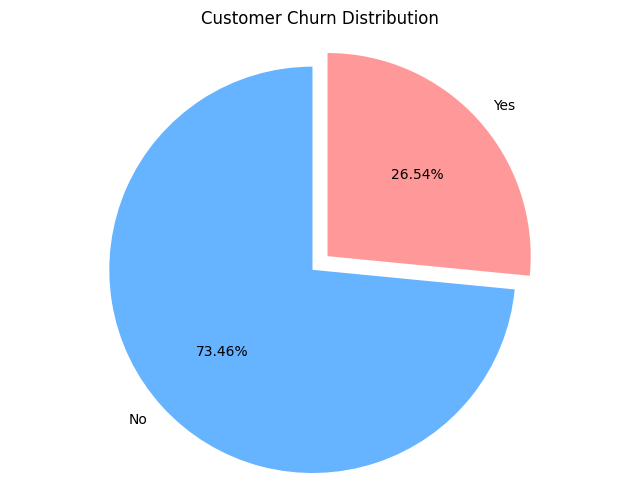

In [19]:
# Define labels and colors
labels = ['No', 'Yes']
colors = ['#66b3ff', '#ff9999']  # Blue for No, Red for Yes
explode = (0, 0.1)  # Explode the 'Yes' slice

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90, explode=explode)
plt.title('Customer Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show();

> Clearly, this dataset exhibits a class imbalance, with 73.46% of customers indicating they won't churn. This imbalance will be considered while splitting the dataset.

#### Distribution of Numerical Features by Churn Status

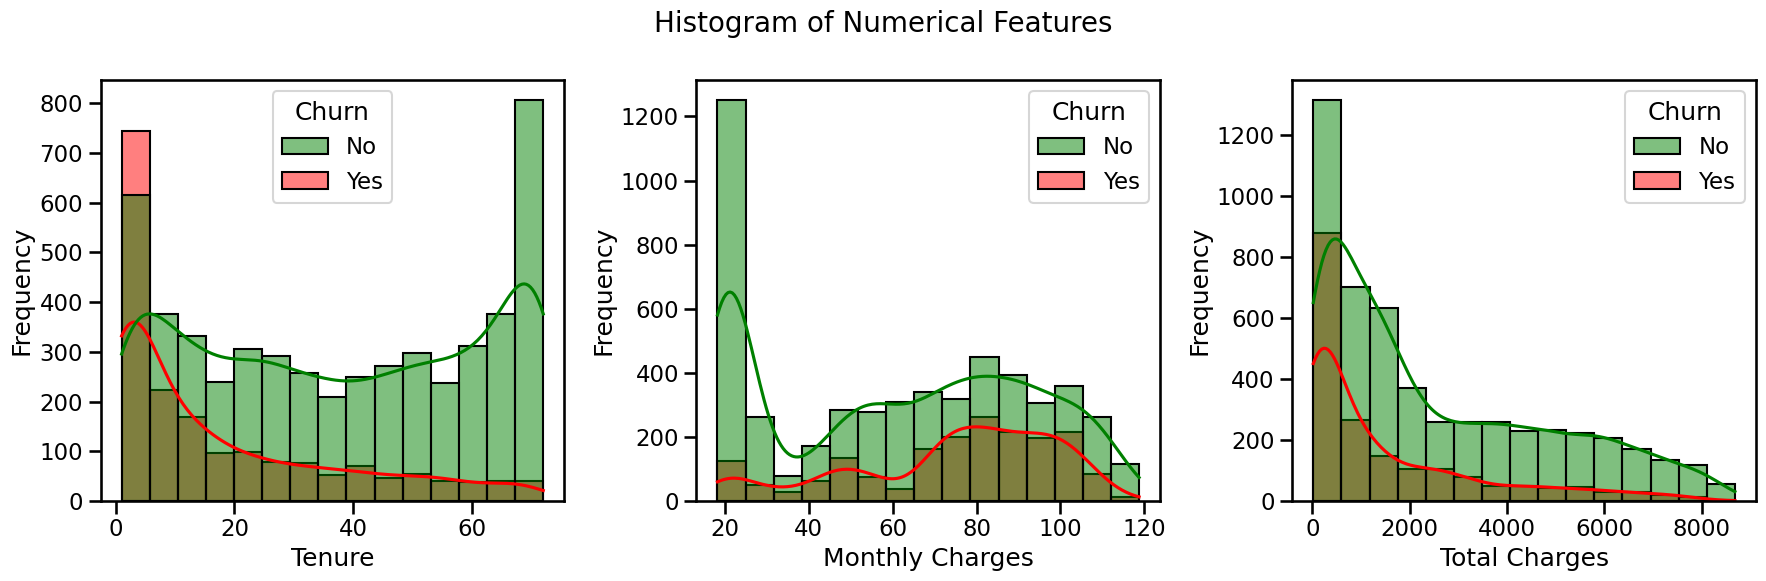

In [20]:
# Set the context and font scale
sns.set_context('talk', font_scale=1.0)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Overall title for the plot
plt.suptitle('Histogram of Numerical Features', fontsize=20)

# Define custom colors for 'Yes' (churn) and 'No' (no churn)
colors = {'Yes': 'red', 'No': 'green'}

# Plotting histograms for each numerical feature with custom colors
sns.histplot(x=df['tenure'], hue=df['Churn'], bins=15, kde=True, ax=axes[0], palette=colors, edgecolor='black')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Frequency')

sns.histplot(x=df['MonthlyCharges'], hue=df['Churn'], bins=15, kde=True, ax=axes[1], palette=colors, edgecolor='black')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('Frequency')

sns.histplot(x=df['TotalCharges'], hue=df['Churn'], bins=15, kde=True, ax=axes[2], palette=colors, edgecolor='black')
axes[2].set_xlabel('Total Charges')
axes[2].set_ylabel('Frequency')

# Adjust layout and display plot
plt.tight_layout()
plt.show();

- Customers who stay with the company for longer periods are less likely to churn.
- Additionally, the distribution of total charges is skewed, I will address it by applying log transformation later.

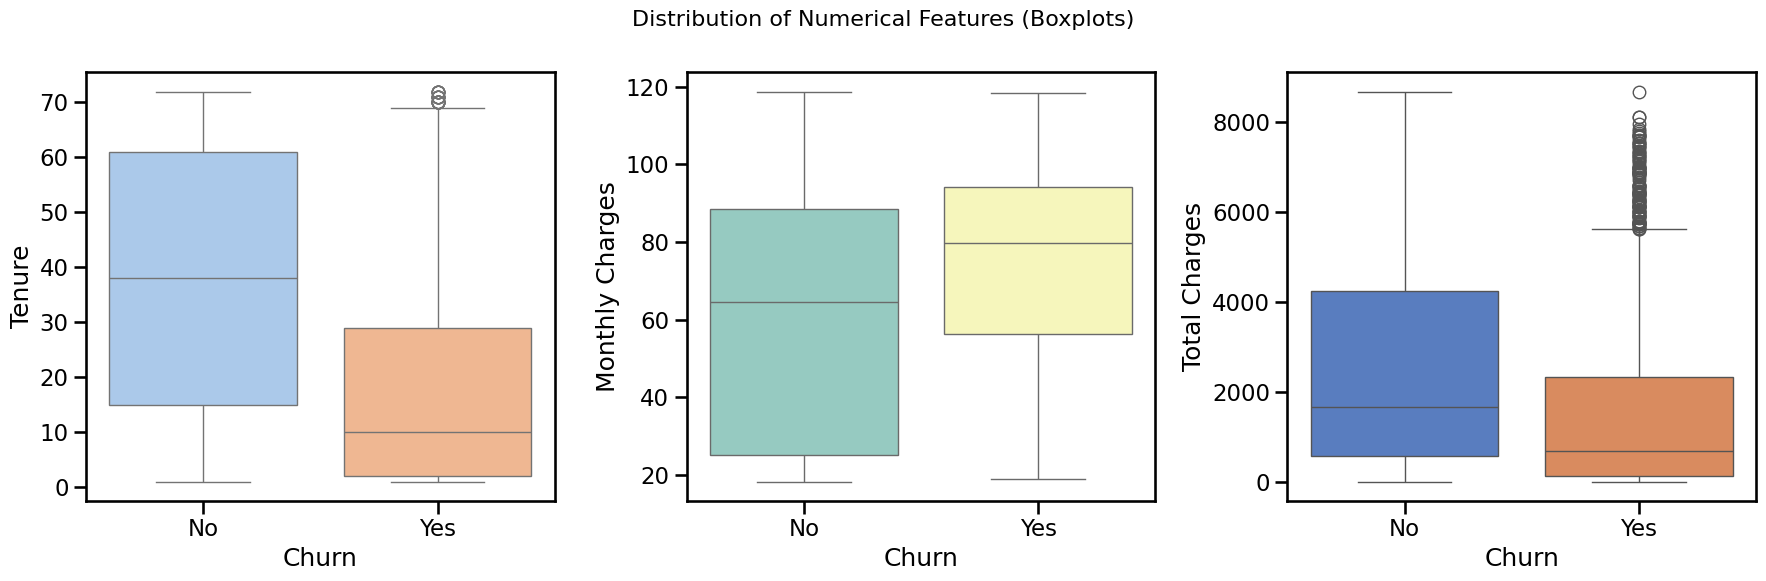

In [21]:
# Set the context and font scale
sns.set_context('talk', font_scale=1.0)

# Create subplots for boxplots of numerical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Overall title for the plot
plt.suptitle('Distribution of Numerical Features (Boxplots)', fontsize=16)

# Plotting boxplots for each numerical feature
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0], palette='pastel')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Tenure')

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1], palette='Set3')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Monthly Charges')

sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2], palette='muted')
axes[2].set_xlabel('Churn')
axes[2].set_ylabel('Total Charges')

# Adjust layout and display plot
plt.tight_layout()
plt.show();

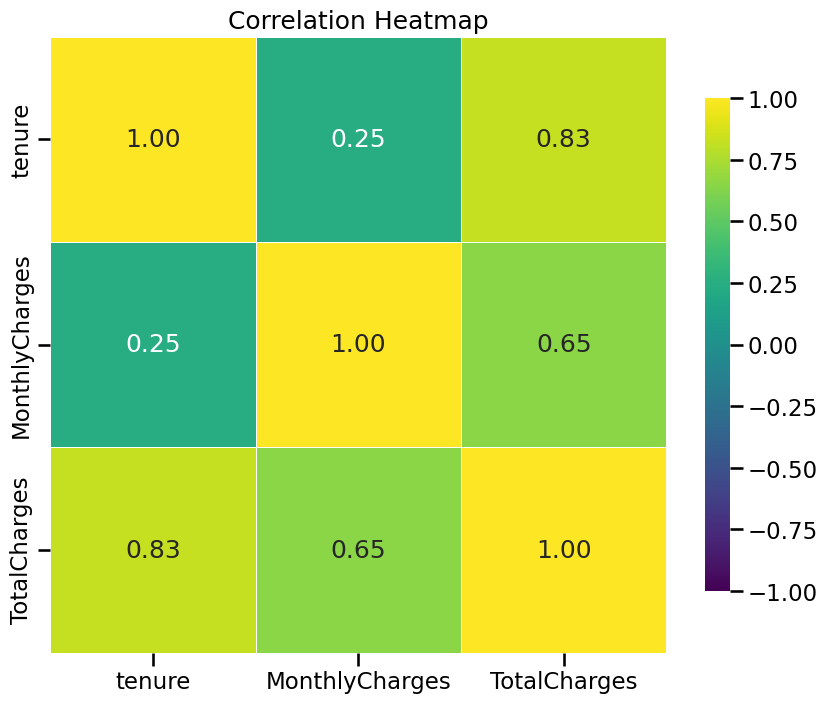

In [22]:
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure with a smaller size
plt.figure(figsize=(10,8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

- There appears to be a positive correlation between tenure and total charges. As the tenure increases, the total charges also tend to increase, suggesting that long-term customers may generate higher total charges over time.


#### Analyzing Categorical Features

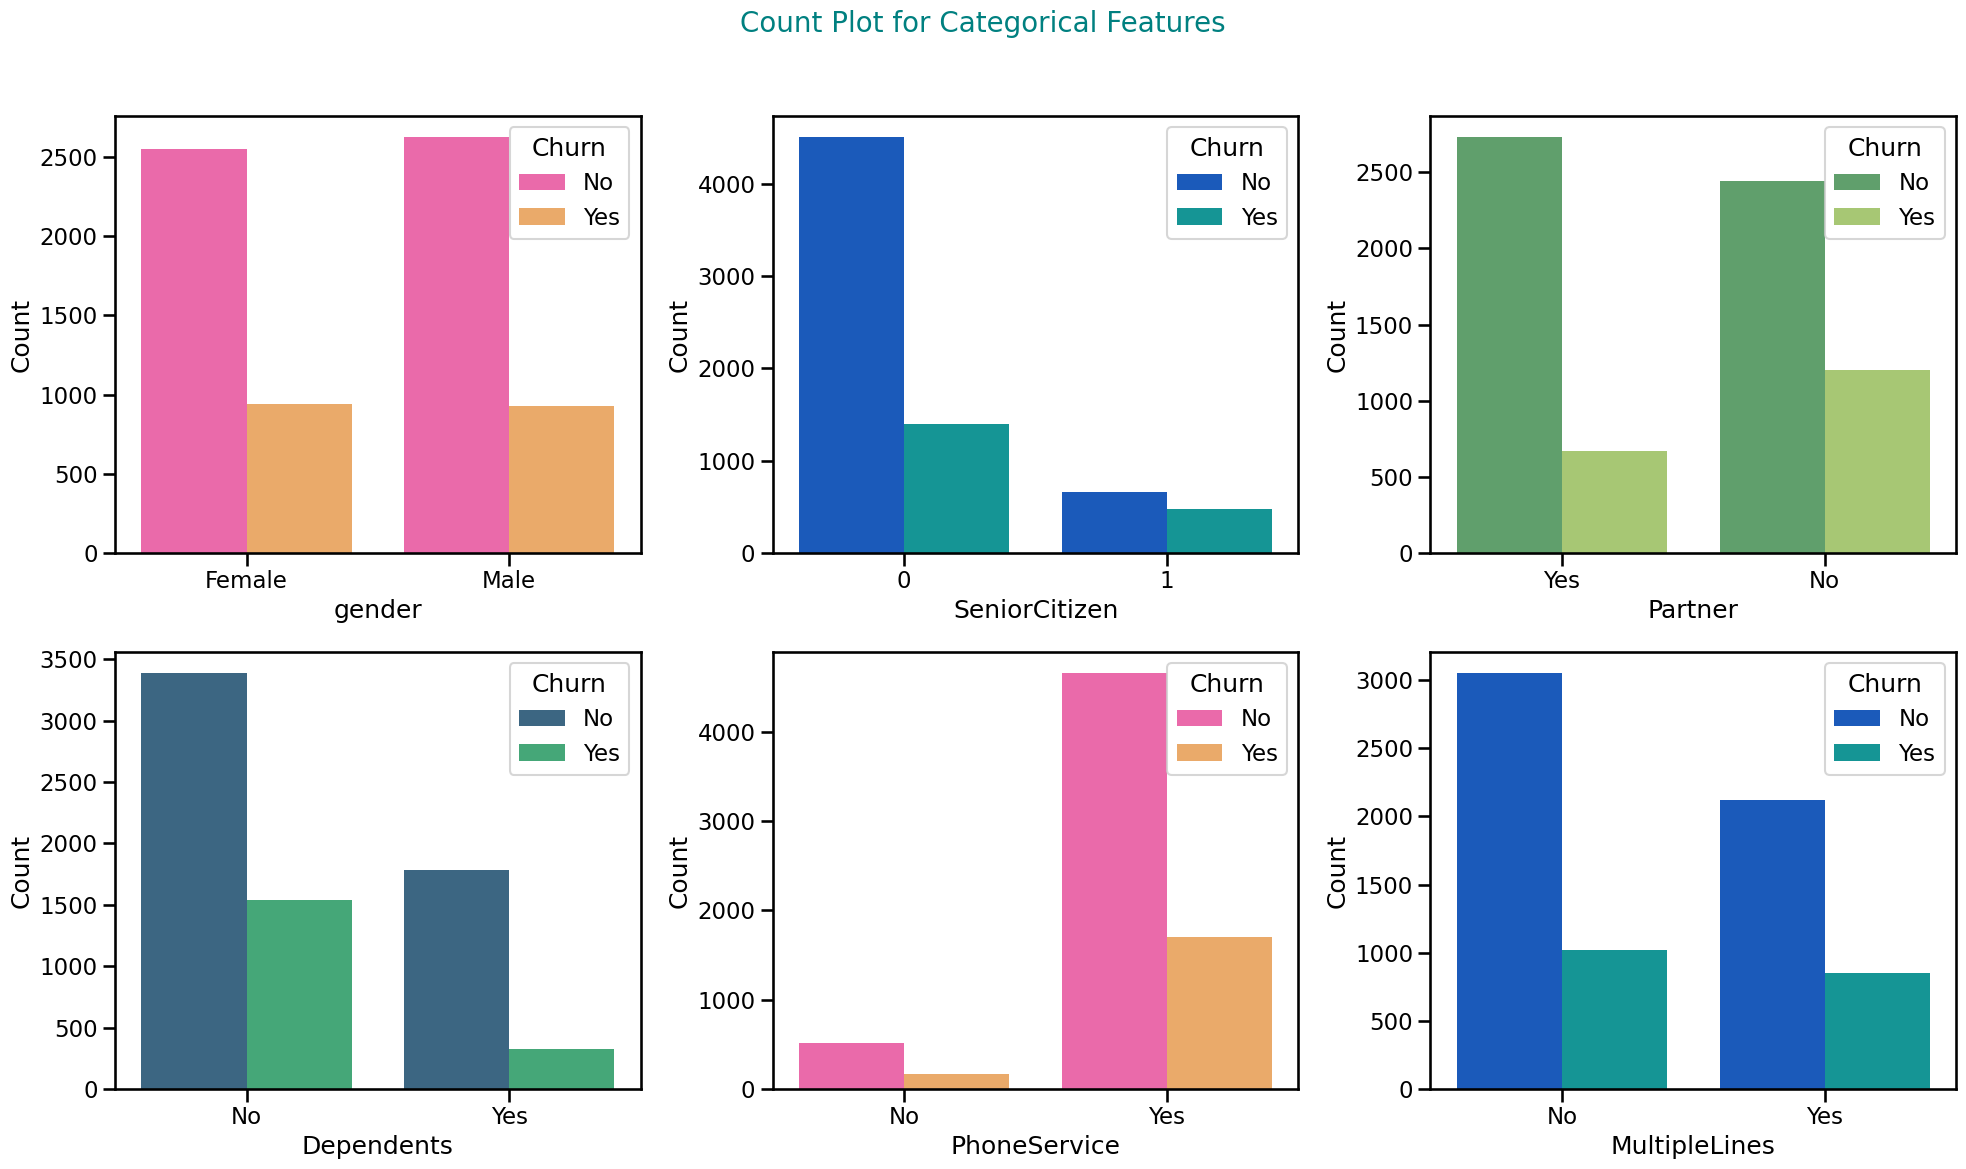

In [23]:
# First set of count plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
plt.suptitle('Count Plot for Categorical Features', fontsize=20, color='teal')

categorical_features1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines']
palettes1 = ['spring', 'winter', 'summer', 'viridis', 'spring', 'winter']

for ax, feature, palette in zip(axes.flat, categorical_features1, palettes1):
    sns.countplot(x=feature, data=df, hue='Churn', ax=ax, palette=palette)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Churn')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();

##### Observations:
- **Gender**: The churn distribution is similar across genders.
- **Senior Citizen**: Senior citizens have a higher churn rate compared to non-senior citizens.
- **Partner**: Customers without partners tend to churn more.
- **Dependents**: Customers without dependents have a higher churn rate.
- **Phone Service**: The majority of customers have phone service, with a balanced churn rate.
- **Multiple Lines**: Customers with multiple lines have a slightly higher churn rate.

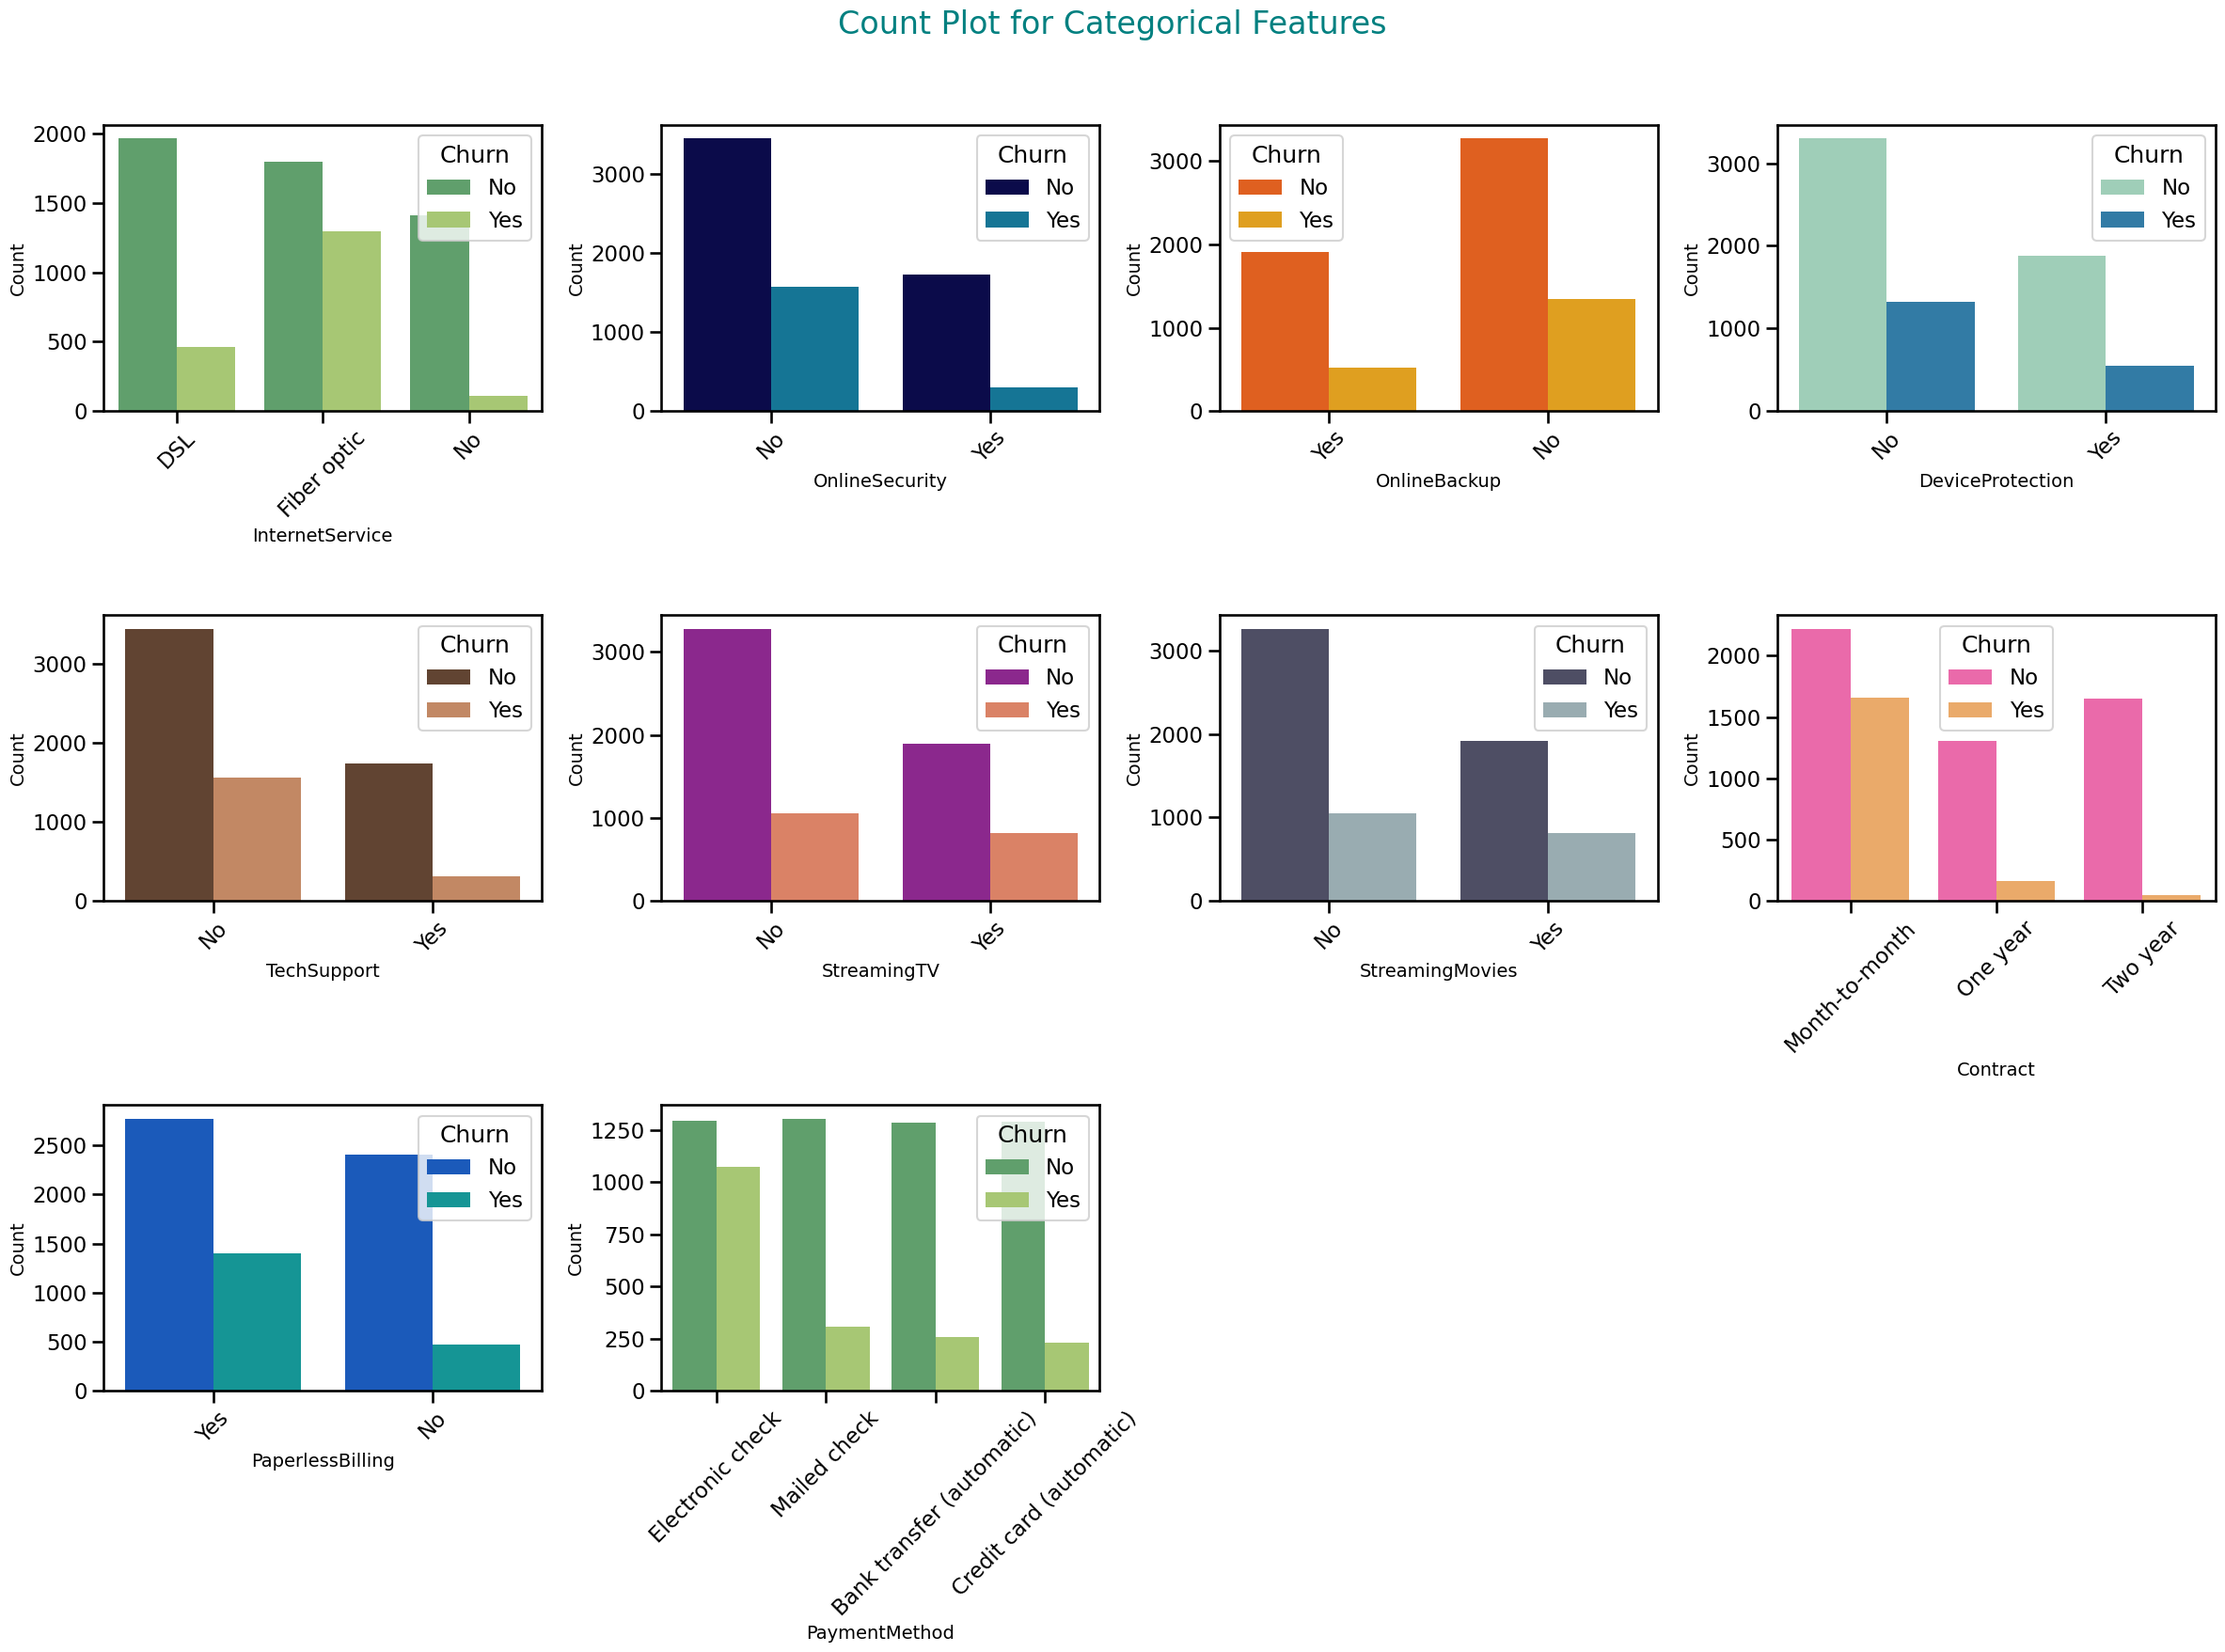

In [24]:
# Second set of count plots
fig, axes = plt.subplots(3, 4, figsize=(24, 18))
plt.suptitle('Count Plot for Categorical Features', fontsize=24, color='teal')

categorical_features2 = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
palettes2 = ['summer', 'ocean', 'autumn', 'YlGnBu', 'copper', 'plasma', 'bone', 'spring', 'winter', 'summer']

for ax, feature, palette in zip(axes.flat, categorical_features2, palettes2):
    sns.countplot(x=feature, data=df, hue='Churn', ax=ax, palette=palette)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.legend(title='Churn')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide any extra subplots
for j in range(len(categorical_features2), axes.size):
    fig.delaxes(axes.flat[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();

### Observations:
- **Internet Service**: The type of internet service affects churn, with DSL customers having a lower churn rate.
- **Online Security**: Customers without online security churn more.
- **Online Backup**: Customers without online backup churn more.
- **Device Protection**: Customers without device protection churn more.
- **Tech Support**: Customers without tech support churn more.
- **Streaming TV**: Streaming TV service affects churn slightly.
- **Streaming Movies**: Streaming movies service affects churn slightly.
- **Contract**: Customers with month-to-month contracts have a higher churn rate.
- **Paperless Billing**: Customers with paperless billing churn more.
- **Payment Method**: Payment methods like electronic check are associated with higher churn rates.

### Checking for Missing Values

In [25]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> There are no missing values.

### Handling Skewness

In [26]:
from scipy.stats import skew

In [27]:
skew_df = pd.DataFrame(df.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(df[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)

skew_df

,Feature,Skew,Absolute Skew
0,tenure,0.238505,0.238505
1,MonthlyCharges,-0.220477,0.220477
2,TotalCharges,0.963584,0.963584


In [28]:
# Apply log transformation to highly skewed features
high_skew_features = skew_df[skew_df['Absolute Skew'] > 0.9]['Feature']
df[high_skew_features] = df[high_skew_features].apply(lambda x: np.log1p(x))

print("Log transformation applied to highly skewed features:")
print(high_skew_features)

Log transformation applied to highly skewed features:
2    TotalCharges
Name: Feature, dtype: object


## Encoding Categorical Data and Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

##### Binary Encoding

In [30]:
binary_columns = ['gender', 'Partner', 'SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for column in binary_columns:
    df[column] = le.fit_transform(df[column])

##### One Hot Encoding

In [31]:
# Create dummy variables for 'PaymentMethod'
dummies_payment = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod', drop_first=True)

# Concatenate dummies with original dataframe
df = pd.concat([df, dummies_payment], axis=1)

# Drop the original 'PaymentMethod' column
df.drop('PaymentMethod', axis=1, inplace=True)

##### Ordinal Encoding

In [32]:
# Define ordinal mappings
internet_ordering = {'No': 0, 'DSL': 1, 'Fiber optic': 2}
contract_ordering = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

# Apply ordinal encoding
df['InternetService'] = df['InternetService'].map(internet_ordering)
df['Contract'] = df['Contract'].map(contract_ordering)

#### Scaling

In [33]:
# Splitting the dataset into features and target variable

X = df.drop('Churn', axis= 1)
y = df['Churn']

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

##### Preparing Training and Test Sets

In [35]:
from sklearn.model_selection import train_test_split

Split dataset into training and testing sets with a test size of 20%, ensuring stratification by `y` to maintain class distribution as observed in earlier exploratory analysis.


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42)

In [37]:
# Print value counts for y_train
print("Training set - Churn distribution:")
print(y_train.value_counts())
print()

# Print value counts for y_test
print("Testing set - Churn distribution:")
print(y_test.value_counts())

Training set - Churn distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64

Testing set - Churn distribution:
Churn
0    1035
1     374
Name: count, dtype: int64


## Building Model


Import TensorFlow and set up the necessary modules for building a sequential model with dense layers.

In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Define a sequential model with three dense layers: the first layer has 32 neurons with ReLU activation, the second layer has 16 neurons with ReLU activation, and the final layer has 1 neuron with a sigmoid activation function.

In [39]:
model = Sequential()

model.add(Dense(32,activation='relu',input_dim=21))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1249 (4.88 KB)
Trainable params: 1249 (4.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Creating an EarlyStopping callback in Keras that monitors validation loss, waits for no improvement (`patience=5` epochs), and restores the best weights found during training (`restore_best_weights=True`).


In [41]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

Compiling the Keras Sequential model with Adam optimizer, binary crossentropy loss function, and metrics including accuracy and AUC. Training the model on training data `X_train` and `y_train`, with 20% validation split, batch size of 64, and early stopping callback applied.


In [42]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy',keras.metrics.AUC(name='auc')])

In [43]:
history = model.fit(X_train,y_train,validation_split=0.20,batch_size=64,epochs=20,verbose=1,callbacks = early_stopping)

Epoch 1/20
71/71 [==============================] - 5s 8ms/step - loss: 0.4932 - accuracy: 0.7715 - auc: 0.7718 - val_loss: 0.4512 - val_accuracy: 0.7728 - val_auc: 0.8086
Epoch 2/20
71/71 [==============================] - 0s 4ms/step - loss: 0.4232 - accuracy: 0.7996 - auc: 0.8405 - val_loss: 0.4424 - val_accuracy: 0.7773 - val_auc: 0.8195
Epoch 3/20
71/71 [==============================] - 0s 5ms/step - loss: 0.4126 - accuracy: 0.8072 - auc: 0.8498 - val_loss: 0.4406 - val_accuracy: 0.7870 - val_auc: 0.8221
Epoch 4/20
71/71 [==============================] - 0s 4ms/step - loss: 0.4066 - accuracy: 0.8103 - auc: 0.8550 - val_loss: 0.4385 - val_accuracy: 0.7853 - val_auc: 0.8245
Epoch 5/20
71/71 [==============================] - 0s 5ms/step - loss: 0.4035 - accuracy: 0.8099 - auc: 0.8576 - val_loss: 0.4379 - val_accuracy: 0.7879 - val_auc: 0.8254
Epoch 6/20
71/71 [==============================] - 0s 5ms/step - loss: 0.3998 - accuracy: 0.8145 - auc: 0.8603 - val_loss: 0.4379 - val_acc

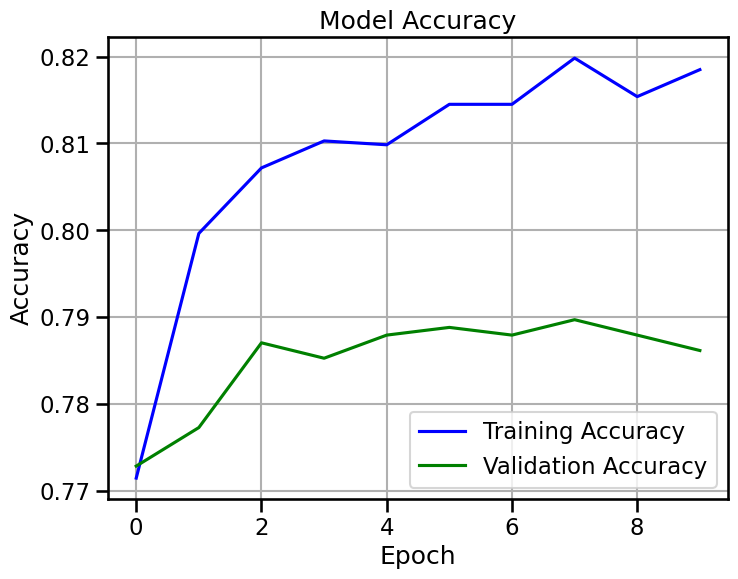

In [44]:
# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show();

***Evaluate model on Test set***

In [45]:
loss, accuracy, auc = model.evaluate(X_test, y_test)

# Print evaluation results
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test AUC: {auc:.4f}')

45/45 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.7921 - auc: 0.8486
Test Loss: 0.4121
Test Accuracy: 0.7921
Test AUC: 0.8486


## Hyperparameter Tuning

*Further, I am employing Keras Tuner to search for optimal hyperparameters using Random Search, aiming to maximize validation accuracy and achieve the Best Model.*

In [46]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [47]:
import kerastuner as kt

In [48]:
def build_model(hp):
    model = Sequential()

    # Number of layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=6)

    # Loop through layers
    for i in range(num_layers):
        # Input layer needs input_dim
        if i == 0:
            model.add(Dense(units=hp.Int('units_'+str(i), min_value=8, max_value=64, step=8),
                            activation=hp.Choice('activation_'+str(i), values=['relu', 'tanh', 'sigmoid']),
                            input_dim=X_train.shape[1]))
        else:
            model.add(Dense(units=hp.Int('units_'+str(i), min_value=8, max_value=64, step=8),
                            activation=hp.Choice('activation_'+str(i), values=['relu', 'tanh', 'sigmoid'])))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'adadelta']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [49]:
# Initialize tuner
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=3)

In [50]:
# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 12s]
val_accuracy: 0.7870830297470093

Best val_accuracy So Far: 0.8041163682937622
Total elapsed time: 00h 00m 33s


In [51]:
# Get best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0].values

# Display best hyperparameters
print("Best hyperparameters:")
for key, value in best_hp.items():
    print(f"- {key} : {value}")

Best hyperparameters:
- num_layers : 6
- units_0 : 40
- activation_0 : sigmoid
- optimizer : rmsprop
- units_1 : 8
- activation_1 : relu
- units_2 : 8
- activation_2 : relu
- units_3 : 8
- activation_3 : relu
- units_4 : 8
- activation_4 : relu
- units_5 : 8
- activation_5 : relu


In [52]:
# Get best model
best_model = tuner.get_best_models(num_models=1)[0]

In [53]:
# Print model summary
print("\nBest Model Summary:")
best_model.summary()


Best Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                880       
                                                                 
 dense_1 (Dense)             (None, 8)                 328       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None,

Training `best_model` on `X_train` and `y_train` with a validation split of 20%, using a batch size of 64, running for 20 epochs starting from epoch 6, with early stopping based on validation loss.


In [54]:
history = best_model.fit(X_train,y_train,validation_split=0.20,batch_size=64,epochs=20,initial_epoch=5,verbose=1,callbacks = early_stopping)

Epoch 6/20
71/71 [==============================] - 2s 9ms/step - loss: 0.4081 - accuracy: 0.8085 - val_loss: 0.4397 - val_accuracy: 0.7853
Epoch 7/20
71/71 [==============================] - 0s 5ms/step - loss: 0.4075 - accuracy: 0.8083 - val_loss: 0.4322 - val_accuracy: 0.7968
Epoch 8/20
71/71 [==============================] - 1s 10ms/step - loss: 0.4066 - accuracy: 0.8085 - val_loss: 0.4373 - val_accuracy: 0.7853
Epoch 9/20
71/71 [==============================] - 1s 11ms/step - loss: 0.4034 - accuracy: 0.8107 - val_loss: 0.4353 - val_accuracy: 0.7888
Epoch 10/20
71/71 [==============================] - 1s 15ms/step - loss: 0.4052 - accuracy: 0.8118 - val_loss: 0.4365 - val_accuracy: 0.7862
Epoch 11/20
71/71 [==============================] - 1s 12ms/step - loss: 0.4054 - accuracy: 0.8099 - val_loss: 0.4335 - val_accuracy: 0.8030
Epoch 12/20
71/71 [==============================] - 1s 12ms/step - loss: 0.4045 - accuracy: 0.8110 - val_loss: 0.4346 - val_accuracy: 0.7862


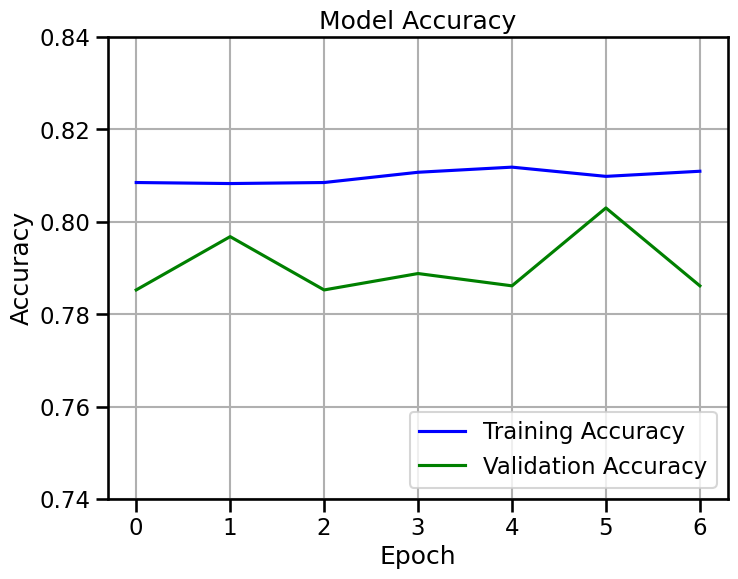

In [55]:
## Plot training & validation accuracy values for Best Model
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.74, 0.84])
plt.legend(loc='lower right')
plt.grid(True)
plt.show();

### ***Evaluation Results***

In [56]:
loss, accuracy = best_model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

45/45 [==============================] - 0s 4ms/step - loss: 0.4169 - accuracy: 0.8098
Test Loss: 0.4169
Test Accuracy: 0.8098


In [57]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

In [58]:
# Predict probabilities
Y_pred_prob = best_model.predict(X_test)

# Convert probabilities to binary predictions
Y_pred = (Y_pred_prob > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, Y_pred))

45/45 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.58      0.62       374

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.80      0.81      0.81      1409



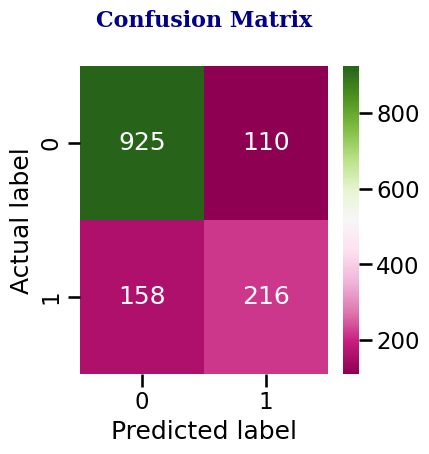

In [59]:
plt.figure(figsize=(4,4))
cnf_matrix = confusion_matrix(y_test,Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PiYG" ,fmt="g")
plt.title('Confusion Matrix', y=1.1, fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size':16})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show();

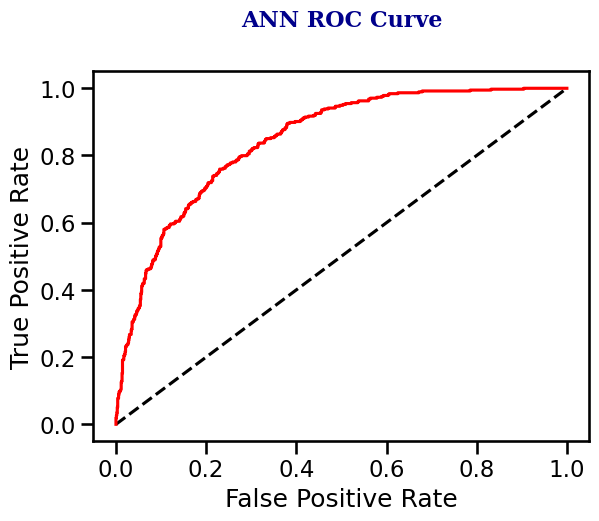

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve',y=1.1, fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size':16})
plt.show();

### Saving the Model

In [64]:
# Save the entire model to a HDF5 file
model.save('/content/ann_model.h5')